In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import os.path
import os


In [3]:
BTV = pd.read_csv('BTVpolice.csv')

In [4]:
print('---------Call Type---------')
print(BTV['call_type'].value_counts())
print('\n\n---------Call Street---------')
print(BTV['Street'].value_counts())

---------Call Type---------
call_type
Suspicious Event                       5976
Foot Patrol                            5722
Welfare Check                          2424
Trespass                               2281
Assist - Public                        2226
                                       ... 
Runaway Apprehension                      1
Search                                    1
Embezzlement                              1
Contributing to Deliquency of Minor       1
Enabling Consumption by Minors            1
Name: count, Length: 128, dtype: int64


---------Call Street---------
Street
North Ave                 4572
Marketplace               3316
Airport Dr                2494
Church St                 2437
College St                1915
                          ... 
Lafountain St/Cedar St       1
I 89 Sb Mm 93.3              1
Browns Court Lot             1
Memorial Auditorium          1
S Prospect / Main St         1
Name: count, Length: 3237, dtype: int64


In [5]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load the dataset
# Replace 'path_to_your_dataset' with the path to your BTVpolice dataset
BTVpolice = pd.read_csv('BTVpolice.csv')

# Filter out rows with missing or invalid coordinates
BTVpolice = BTVpolice.dropna(subset=['Latitude', 'Longitude'])

# Initialize the map centered around Burlington, VT
burlington_map = folium.Map(location=[44.4759, -73.2121], zoom_start=13)

# Prepare data for heatmap
heat_data = BTVpolice[['Latitude', 'Longitude']].values.tolist()

# Add HeatMap layer
HeatMap(heat_data).add_to(burlington_map)

# Display the map
burlington_map



/var/folders/05/b_dps8k90m5d6w0ttvf7hzg40000gn/T/ipykernel_3241/2392251952.py:38: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for i, level in enumerate(contours.collections):


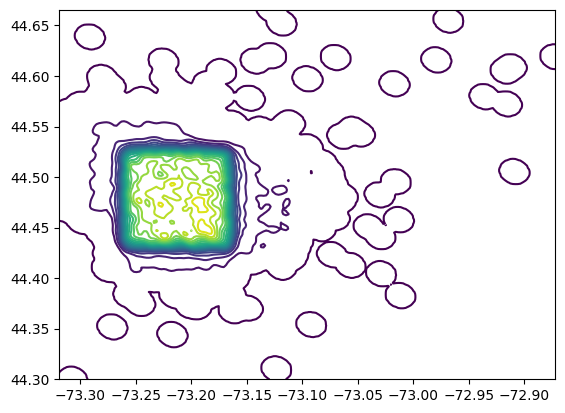

In [6]:
import pandas as pd
import folium
import numpy as np
from scipy import stats
from shapely.geometry import Polygon, mapping
import json
import matplotlib.pyplot as plt


# Drop rows with missing Latitude or Longitude
BTVpolice = BTVpolice.dropna(subset=['Latitude', 'Longitude'])

# Extract longitude and latitude
x = BTVpolice['Longitude'].values
y = BTVpolice['Latitude'].values

# Create a higher-resolution mesh grid for contour plotting
xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), y.max()
xx, yy = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]  # Increased grid resolution

# Calculate the density with Gaussian Kernel Density Estimation with a smaller bandwidth
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = stats.gaussian_kde(values, bw_method=0.1)  # Adjust bandwidth for finer detail
density = np.reshape(kernel(positions).T, xx.shape)

# Define finer and more levels for contour lines
contour_levels = np.linspace(density.min() + 0.0001, density.max(), 20)  # 20 contour levels

# Initialize a list to store GeoJSON features
features = []

# Generate contours using matplotlib and convert them to GeoJSON
fig, ax = plt.subplots()
contours = ax.contour(xx, yy, density, levels=contour_levels)

for i, level in enumerate(contours.collections):
    for contour_path in level.get_paths():
        for segment in contour_path.to_polygons():
            poly = Polygon(segment)
            if poly.is_valid:
                # Convert Polygon to GeoJSON format
                feature = {
                    "type": "Feature",
                    "geometry": mapping(poly),
                    "properties": {"level": contour_levels[i]}
                }
                features.append(feature)

# Create the GeoJSON structure
geojson_data = {
    "type": "FeatureCollection",
    "features": features
}

# Initialize the folium map centered around Burlington, VT
burlington_map = folium.Map(location=[44.4759, -73.2121], zoom_start=11)

# Add GeoJSON data as a layer
folium.GeoJson(
    geojson_data,
    style_function=lambda feature: {
        "fillColor": "blue",
        "color": "black",
        "weight": 1,
        "fillOpacity": 0.05
    }
).add_to(burlington_map)

# Display the map
burlington_map

/var/folders/05/b_dps8k90m5d6w0ttvf7hzg40000gn/T/ipykernel_3241/1680882801.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('plasma', len(contour_levels))  # Select color map and number of colors
/var/folders/05/b_dps8k90m5d6w0ttvf7hzg40000gn/T/ipykernel_3241/1680882801.py:40: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for i, level in enumerate(contours.collections):


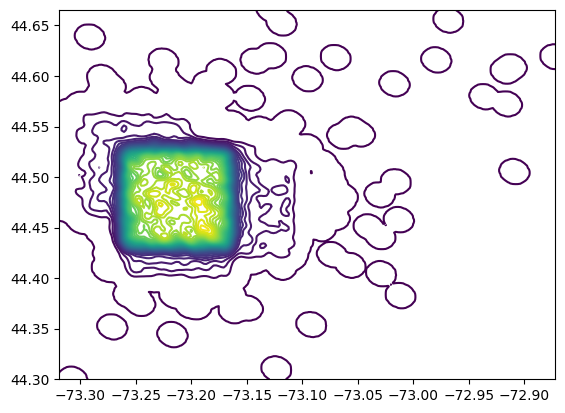

In [9]:
import pandas as pd
import folium
import numpy as np
from scipy import stats
from shapely.geometry import Polygon, mapping
import json
import matplotlib.pyplot as plt
import matplotlib.cm as cm



# Extract longitude and latitude
x = BTVpolice['Longitude'].values
y = BTVpolice['Latitude'].values

# Create a higher-resolution mesh grid for contour plotting
xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), y.max()
xx, yy = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]  # Increased grid resolution

# Calculate the density with Gaussian Kernel Density Estimation with a smaller bandwidth
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = stats.gaussian_kde(values, bw_method=0.1)  # Adjust bandwidth for finer detail
density = np.reshape(kernel(positions).T, xx.shape)

# Define finer and more levels for contour lines
contour_levels = np.linspace(density.min() + 0.0001, density.max(), 40)  # 20 contour levels

# Initialize a list to store GeoJSON features
features = []

# Use a colormap (e.g., 'plasma') to map colors to contour levels
colormap = cm.get_cmap('plasma', len(contour_levels))  # Select color map and number of colors

# Generate contours using matplotlib and convert them to GeoJSON
fig, ax = plt.subplots()
contours = ax.contour(xx, yy, density, levels=contour_levels)

for i, level in enumerate(contours.collections):
    color = colormap(i / len(contour_levels))  # Get color for this level
    for contour_path in level.get_paths():
        for segment in contour_path.to_polygons():
            poly = Polygon(segment)
            if poly.is_valid:
                # Convert Polygon to GeoJSON format
                feature = {
                    "type": "Feature",
                    "geometry": mapping(poly),
                    "properties": {
                        "level": contour_levels[i],
                        "color": f'rgba({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)}, 0.4)'  # RGBA with low opacity
                    }
                }
                features.append(feature)

# Create the GeoJSON structure
geojson_data = {
    "type": "FeatureCollection",
    "features": features
}

# Initialize the folium map centered around Burlington, VT
burlington_map = folium.Map(location=[44.4759, -73.2121], zoom_start=11)

# Add GeoJSON data as a layer with varying colors
folium.GeoJson(
    geojson_data,
    style_function=lambda feature: {
        "fillColor": feature["properties"]["color"],
        "color": "black",
        "weight": 0.5,
        "fillOpacity": 0.1  # Low opacity for overlay effect
    }
).add_to(burlington_map)

# Display the map
burlington_map


/var/folders/05/b_dps8k90m5d6w0ttvf7hzg40000gn/T/ipykernel_64679/2590035649.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('plasma', len(contour_levels))  # Select color map and number of colors
/var/folders/05/b_dps8k90m5d6w0ttvf7hzg40000gn/T/ipykernel_64679/2590035649.py:48: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for i, level in enumerate(contours.collections):


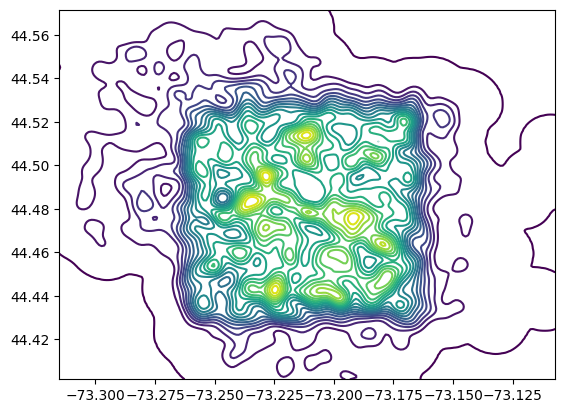

In [33]:
import pandas as pd
import folium
import numpy as np
from scipy import stats
from shapely.geometry import Polygon, mapping
import json
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load the dataset
# Replace 'path_to_your_dataset.csv' with the path to your dataset
BTVpolice = pd.read_csv('BTVpolice.csv')

# Filter the data to include only priority 1 calls
BTVpolice = BTVpolice[BTVpolice['priority'] == "Priority 1"]

# Drop rows with missing Latitude or Longitude
BTVpolice = BTVpolice.dropna(subset=['Latitude', 'Longitude'])

# Extract longitude and latitude
x = BTVpolice['Longitude'].values
y = BTVpolice['Latitude'].values

# Create a higher-resolution mesh grid for contour plotting
xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), y.max()
xx, yy = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]  # Increased grid resolution

# Calculate the density with Gaussian Kernel Density Estimation with a smaller bandwidth
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = stats.gaussian_kde(values, bw_method=0.1)  # Adjust bandwidth for finer detail
density = np.reshape(kernel(positions).T, xx.shape)

# Define finer and more levels for contour lines
contour_levels = np.linspace(density.min() + 0.0001, density.max(), 20)  # 20 contour levels

# Initialize a list to store GeoJSON features
features = []

# Use a colormap (e.g., 'plasma') to map colors to contour levels
colormap = cm.get_cmap('plasma', len(contour_levels))  # Select color map and number of colors

# Generate contours using matplotlib and convert them to GeoJSON
fig, ax = plt.subplots()
contours = ax.contour(xx, yy, density, levels=contour_levels)

for i, level in enumerate(contours.collections):
    color = colormap(i / len(contour_levels))  # Get color for this level
    for contour_path in level.get_paths():
        for segment in contour_path.to_polygons():
            poly = Polygon(segment)
            if poly.is_valid:
                # Convert Polygon to GeoJSON format
                feature = {
                    "type": "Feature",
                    "geometry": mapping(poly),
                    "properties": {
                        "level": contour_levels[i],
                        "color": f'rgba({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)}, 0.4)'  # RGBA with low opacity
                    }
                }
                features.append(feature)

# Create the GeoJSON structure
geojson_data = {
    "type": "FeatureCollection",
    "features": features
}

# Initialize the folium map centered around Burlington, VT
burlington_map = folium.Map(location=[44.4759, -73.2121], zoom_start=13)

# Add GeoJSON data as a layer with varying colors
folium.GeoJson(
    geojson_data,
    style_function=lambda feature: {
        "fillColor": feature["properties"]["color"],
        "color": "black",
        "weight": 1,
        "fillOpacity": 0.4  # Low opacity for overlay effect
    }
).add_to(burlington_map)

# Display the map
burlington_map
